In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [16]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 4s 6ms/step - loss: 0.7060 - accuracy: 0.5557 - val_loss: 0.5433 - val_accuracy: 0.7917
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5120 - accuracy: 0.7944 - val_loss: 0.5082 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4935 - accuracy: 0.7962 - val_loss: 0.4989 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4857 - accuracy: 0.7962 - val_loss: 0.4911 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4790 - accuracy: 0.7962 - val_loss: 0.4847 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4732 - accuracy: 0.7962 - val_loss: 0.4787 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4678 - accuracy: 0.7962 - val_loss: 0.4731 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3387 - accuracy: 0.8634 - val_loss: 0.3592 - val_accuracy: 0.8531
Epoch 59/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3381 - accuracy: 0.8632 - val_loss: 0.3589 - val_accuracy: 0.8535
Epoch 60/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3378 - accuracy: 0.8638 - val_loss: 0.3588 - val_accuracy: 0.8538
Epoch 61/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8628 - val_loss: 0.3587 - val_accuracy: 0.8550
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3369 - accuracy: 0.8628 - val_loss: 0.3583 - val_accuracy: 0.8542
Epoch 63/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3366 - accuracy: 0.8621 - val_loss: 0.3583 - val_accuracy: 0.8542
Epoch 64/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3364 - accuracy: 0.8625 - val_loss: 0.3580 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


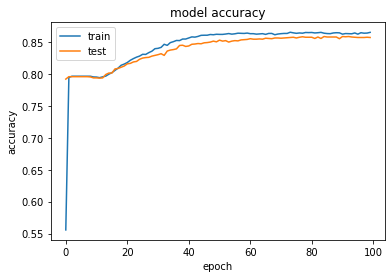

In [20]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

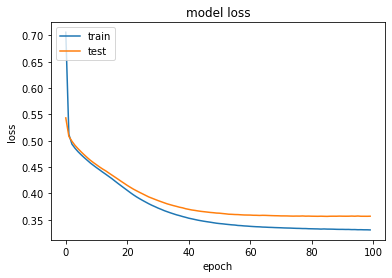

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [24]:
print(cm)
print(score)

[[1507   88]
 [ 193  212]]
0.8595
